In [2]:
import pandas as pd
import numpy as np
import copy
import datetime as dt
import matplotlib.pyplot as plt
ruta = "Mass Shootings Dataset Ver 5.csv"
df = pd.read_csv(ruta, encoding='cp1252')
df.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [3]:
df.tail()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
318,319,Clara Barton Elementary School,"Chicago, Illinois",1/17/1974,Clara Barton Elementary School,Close,Teachers,anger,"On January 17, 1974, a 14-year-old student ent...",1,...,4,0.0,14,NaN,NaN,Yes,Unknown,Male,41.839280,-87.688181
319,320,New Orleans Police Shootings,"New Orleans, Louisiana",12/31/1972,NaN,NaN,random,psycho,"On New Year's Eve in 1972, a 23-year-old ex-Na...",10,...,22,4.0,23,NaN,NaN,Yes,Black American or African American,Male,30.068724,-89.931474
320,321,St. Aloysius Church,"Spokane, Washington",11/11/1971,Church,Close,random,terrorism,"On November 11, 1971, a former MIT student ent...",2,...,5,0.0,NaN,NaN,NaN,Yes,White American or European American,Male,47.673674,-117.415984
321,322,Rose-Mar College of Beauty,"Mesa, Arizona",11/12/1966,Rose-Mar College of Beauty,Close,random,terrorism,"On November 12, 1966, an 18-year-old high scho...",5,...,6,0.0,18,NaN,NaN,Yes,White American or European American,Male,33.422687,-111.816320
322,323,University of Texas at Austin,"Austin, Texas",8/1/1966,University of Texas,Close,random,terrorism,"On August 1, 1966, a 25-year-old engineering s...",17,...,48,0.0,25,NaN,NaN,Yes,White American or European American,Male,30.198887,-97.844159


In [4]:
df.describe()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,317.000000,67.000000,303.000000,303.000000
mean,162.000000,4.436533,6.176471,10.263158,0.129338,0.626866,37.225076,-94.429539
std,93.386294,5.783208,29.889182,33.662309,0.610294,0.487288,5.536365,16.513296
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,21.325512,-161.792752
25%,81.500000,1.000000,1.000000,4.000000,0.000000,0.000000,33.571459,-110.205485
50%,162.000000,3.000000,3.000000,5.000000,0.000000,1.000000,36.443290,-88.122998
75%,242.500000,5.500000,5.000000,9.000000,0.000000,1.000000,41.483844,-81.703237
max,323.000000,59.000000,527.000000,585.000000,5.000000,1.000000,60.790539,-69.707823


In [5]:
cabecera = ["N","Titulo", "Lugar", "Fecha", "Area de incidente", "Espacio Abierto o Cerrado","Objetivo", "Causa", "Resumen", "Muertos", "Heridos", "Victimas Totales", "Policias Muertos", "Edad", "Empleado", "Empleado en", "Problemas mentales", "Raza","Sexo","Latitud","Longitud"]
df.columns = cabecera
df.head()

,N,Titulo,Lugar,Fecha,Area de incidente,Espacio Abierto o Cerrado,Objetivo,Causa,Resumen,Muertos,...,Victimas Totales,Policias Muertos,Edad,Empleado,Empleado en,Problemas mentales,Raza,Sexo,Latitud,Longitud
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [6]:
df.describe(include = "all")

,N,Titulo,Lugar,Fecha,Area de incidente,Espacio Abierto o Cerrado,Objetivo,Causa,Resumen,Muertos,...,Victimas Totales,Policias Muertos,Edad,Empleado,Empleado en,Problemas mentales,Raza,Sexo,Latitud,Longitud
count,323.000000,323,278,323,261,295,318,246,323,323.000000,...,323.000000,317.000000,179,67.000000,41,323,321,323,303.000000,303.000000
unique,NaN,322,226,290,175,4,54,16,323,NaN,...,NaN,NaN,51,NaN,36,5,17,6,NaN,NaN
top,NaN,Killeen,"Seattle, Washington",2/20/2016,Home,Close,random,psycho,"On January 29, 1979, a 16-year-old opened fire...",NaN,...,NaN,NaN,34,NaN,Fort Hood,Unknown,White American or European American,Male,NaN,NaN
freq,NaN,2,5,4,43,197,140,68,1,NaN,...,NaN,NaN,7,NaN,3,110,122,272,NaN,NaN
mean,162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.436533,...,10.263158,0.129338,NaN,0.626866,NaN,NaN,NaN,NaN,37.225076,-94.429539
std,93.386294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.783208,...,33.662309,0.610294,NaN,0.487288,NaN,NaN,NaN,NaN,5.536365,16.513296
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,3.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,21.325512,-161.792752
25%,81.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,4.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,33.571459,-110.205485
50%,162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,...,5.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,36.443290,-88.122998
75%,242.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000,...,9.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,41.483844,-81.703237


In [7]:
columnas = list(df)
for columna in columnas:
    print ("Cantidad de datos sin " + columna + ": " + str(len(df) - df[columna].count()))
    print (str(np.round((len(df) - df[columna].count())/float(len(df))*100,2))+"%")
    print ("-------")

Cantidad de datos sin N: 0
0.0%
-------
Cantidad de datos sin Titulo: 0
0.0%
-------
Cantidad de datos sin Lugar: 45
13.93%
-------
Cantidad de datos sin Fecha: 0
0.0%
-------
Cantidad de datos sin Area de incidente: 62
19.2%
-------
Cantidad de datos sin Espacio Abierto o Cerrado: 28
8.67%
-------
Cantidad de datos sin Objetivo: 5
1.55%
-------
Cantidad de datos sin Causa: 77
23.84%
-------
Cantidad de datos sin Resumen: 0
0.0%
-------
Cantidad de datos sin Muertos: 0
0.0%
-------
Cantidad de datos sin Heridos: 0
0.0%
-------
Cantidad de datos sin Victimas Totales: 0
0.0%
-------
Cantidad de datos sin Policias Muertos: 6
1.86%
-------
Cantidad de datos sin Edad: 144
44.58%
-------
Cantidad de datos sin Empleado: 256
79.26%
-------
Cantidad de datos sin Empleado en: 282
87.31%
-------
Cantidad de datos sin Problemas mentales: 0
0.0%
-------
Cantidad de datos sin Raza: 2
0.62%
-------
Cantidad de datos sin Sexo: 0
0.0%
-------
Cantidad de datos sin Latitud: 20
6.19%
-------
Cantidad de 

In [8]:
df = df.drop(['Resumen','Empleado','Latitud','Longitud','Empleado en','Area de incidente','Espacio Abierto o Cerrado','Objetivo','Causa','Problemas mentales','Policias Muertos','Titulo'], axis=1)

In [9]:
df.head()

,N,Lugar,Fecha,Muertos,Heridos,Victimas Totales,Edad,Raza,Sexo
0,1,"Sutherland Springs, TX",11/5/2017,26,20,46,26,White,M
1,2,"Thornton, CO",11/1/2017,3,0,3,47,White,M
2,3,"Edgewood, MD",10/18/2017,3,3,6,37,Black,M
3,4,"Las Vegas, NV",10/1/2017,59,527,585,64,White,M
4,5,"San Francisco, CA",6/14/2017,3,2,5,38,Asian,M


In [10]:
df.Fecha.unique()

array(['11/5/2017', '11/1/2017', '10/18/2017', '10/1/2017', '6/14/2017',
       '6/7/2017', '6/5/2017', '5/12/2017', '4/18/2017', '1/6/2017',
       '9/23/2016', '7/17/2016', '7/7/2016', '6/12/2016', '4/29/2016',
       '4/26/2016', '4/24/2016', '4/21/2016', '4/19/2016', '4/18/2016',
       '4/9/2016', '4/7/2016', '4/1/2016', '3/31/2016', '3/26/2016',
       '3/25/2016', '3/21/2016', '3/20/2016', '3/19/2016', '3/15/2016',
       '3/13/2016', '3/12/2016', '3/11/2016', '3/9/2016', '3/7/2016',
       '3/6/2016', '3/5/2016', '2/28/2016', '2/27/2016', '2/26/2016',
       '2/25/2016', '2/23/2016', '2/21/2016', '2/20/2016', '2/19/2016',
       '2/9/2016', '2/7/2016', '2/6/2016', '1/31/2016', '1/30/2016',
       '1/29/2016', '1/27/2016', '1/25/2016', '1/23/2016', '1/17/2016',
       '1/11/2016', '1/7/2016', '1/6/2016', '12/6/2015', '12/2/2015',
       '11/27/2015', '11/23/2015', '11/15/2015', '11/13/2015',
       '11/7/2015', '11/4/2015', '10/31/2015', '10/21/2015', '10/9/2015',
       '10/1/2

In [11]:
df['Fecha'] = df.apply(lambda row: dt.datetime(int(row.Fecha.split('/')[2]),int(row.Fecha.split('/')[0]),int(row.Fecha.split('/')[1])), axis = 1)

In [12]:
df.head()

,N,Lugar,Fecha,Muertos,Heridos,Victimas Totales,Edad,Raza,Sexo
0,1,"Sutherland Springs, TX",2017-11-05,26,20,46,26,White,M
1,2,"Thornton, CO",2017-11-01,3,0,3,47,White,M
2,3,"Edgewood, MD",2017-10-18,3,3,6,37,Black,M
3,4,"Las Vegas, NV",2017-10-01,59,527,585,64,White,M
4,5,"San Francisco, CA",2017-06-14,3,2,5,38,Asian,M


In [13]:
dict_Sexo = {'M': 1, 'Male': 1, 'Unknown': -1, 'Female':0, 'Male/Female':-1, 'M/F':-1, 'Unclear ':-1}

In [14]:
df['Sexo'] = df.apply(lambda row: dict_Sexo[row['Sexo']], axis = 1)

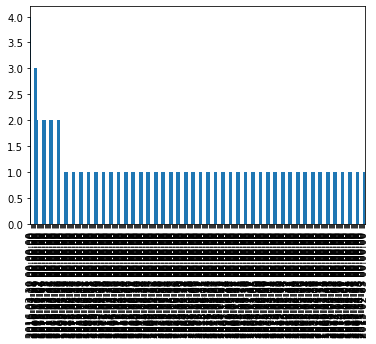

In [15]:
fig, ax = plt.subplots()
df['Fecha'].value_counts().plot(ax=ax, kind='bar')

0      55
3      49
2      47
1      43
4      38
5      21
6      15
7      10
9       5
10      5
12      4
13      4
14      3
8       3
21      3
11      2
19      2
20      2
23      2
32      2
527     1
70      1
16      1
24      1
25      1
30      1
53      1
15      1
Name: Heridos, dtype: int64

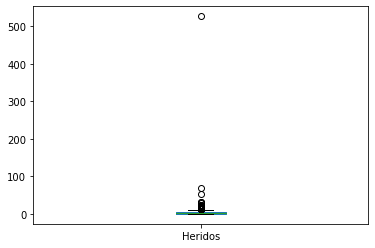

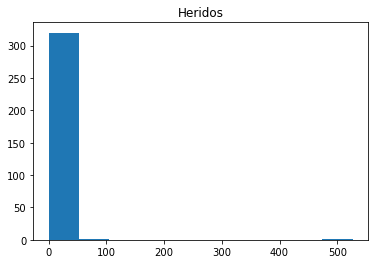

In [16]:
df.boxplot(column = 'Heridos',grid = False)
df.hist(column = 'Heridos',grid = False)
df['Heridos'].value_counts()

In [17]:
df.Raza.unique()

array(['White', 'Black', 'Asian', nan, 'Latino', 'Other', 'Unknown',
       'Black American or African American',
       'White American or European American', 'Asian American',
       'Some other race', 'Two or more races',
       'Black American or African American/Unknown',
       'White American or European American/Some other Race',
       'Native American or Alaska Native', 'white', 'black',
       'Asian American/Some other race'], dtype=object)

In [18]:
df['Raza'].replace(np.nan,'Otro',inplace=True)
df.Raza.unique()

array(['White', 'Black', 'Asian', 'Otro', 'Latino', 'Other', 'Unknown',
       'Black American or African American',
       'White American or European American', 'Asian American',
       'Some other race', 'Two or more races',
       'Black American or African American/Unknown',
       'White American or European American/Some other Race',
       'Native American or Alaska Native', 'white', 'black',
       'Asian American/Some other race'], dtype=object)

In [19]:
dict_Raza = {'Black': 2, 'Black American or African American': 2,'Black American or African American/Unknown': 2, 'black': 2,'White': 1,'White American or European American': 1,'White American or European American/Some other Race': 1,'white': 1,'Asian': 4,'Asian American': 4,'Asian American/Some other race': 4,'Native American or Alaska Native': 6,'Latino': 5,'Other': 3,'Unknown': 3,'Some other race': 3,'Two or more races': 3,'Otro': 3}

In [20]:
df['Raza'] = df.apply(lambda row: dict_Raza[row['Raza']], axis = 1)

In [21]:
df.head()

,N,Lugar,Fecha,Muertos,Heridos,Victimas Totales,Edad,Raza,Sexo
0,1,"Sutherland Springs, TX",2017-11-05,26,20,46,26,1,1
1,2,"Thornton, CO",2017-11-01,3,0,3,47,1,1
2,3,"Edgewood, MD",2017-10-18,3,3,6,37,2,1
3,4,"Las Vegas, NV",2017-10-01,59,527,585,64,1,1
4,5,"San Francisco, CA",2017-06-14,3,2,5,38,4,1


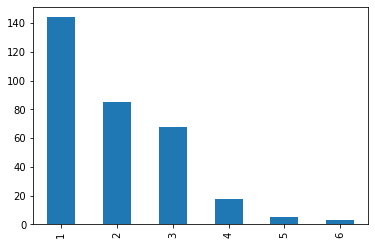

In [22]:
fig, ax = plt.subplots()
df['Raza'].value_counts().plot(ax=ax, kind='bar')

In [23]:
df.Raza.value_counts()

1    144
2     85
3     68
4     18
5      5
6      3
Name: Raza, dtype: int64

 1    292
-1     26
 0      5
Name: Sexo, dtype: int64

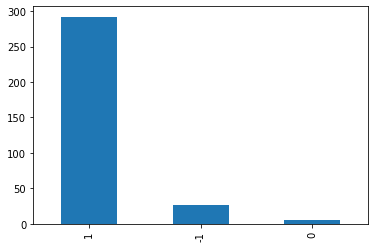

In [24]:
fig, ax = plt.subplots()
df['Sexo'].value_counts().plot(ax=ax, kind='bar')
df.Sexo.value_counts()

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df['Lugar'].value_counts()

Seattle, Washington                                           5
Phoenix, Arizona                                              4
Killeen, Texas                                                4
Tucson, Arizona                                               3
Omaha, Nebraska                                               3
Los Angeles, California                                       3
Las Vegas, Nevada                                             3
Orlando, Florida                                              3
New Orleans, Louisiana                                        3
Cleveland, Ohio                                               3
Dallas, Texas                                                 3
Chicago, Illinois                                             3
Birmingham, Alabama                                           2
Atlanta, Georgia                                              2
San Francisco, CA                                             2
Brookfield, Wisconsin                   

In [26]:
def dict_estado_a_numero():
    dd = {'alabama': 1, 
    'alaska': 2, 
    'arizona': 3, 
    'arkansas': 4, 
    'california': 5,
    'CA':5,
    'north carolina': 6, 
    'south carolina': 7, 
    'colorado': 8,
    'CO': 8,
    'connecticut': 9, 
    'north dakota': 10, 
    'south dakota': 11, 
    'delaware': 12, 
    'florida': 13, 
    'georgia': 14, 
    'hawaii': 15, 
    'idaho': 16, 
    'illinois': 17, 
    'indiana': 18, 
    'iowa': 19, 
    'kansas': 20, 
    'kentucky': 21, 
    'louisiana': 22,
    'LA':22,
    'maine': 23, 
    'maryland': 24,
    'md':24,
    'massachusetts': 25, 
    'michigan': 26, 
    'minnesota': 27, 
    'mississippi': 28, 
    'missouri': 29, 
    'montana': 30, 
    'nebraska': 31, 
    'nevada': 32, 
    'nv':32,
    'new jersey': 33, 
    'new york': 34, 
    'new hampshire': 35, 
    'new mexico': 36, 
    'ohio': 37, 
    'oklahoma': 38, 
    'oregon': 39, 
    'pennsylvania': 40,
    'pa':40,
    'rhode island': 41, 
    'tennessee': 42, 
    'texas': 43,
    'tx': 43,
    'utah': 44, 
    'vermont': 45, 
    'WA':45,
    'virginia': 46, 
    'west virginia': 47, 
    'washington': 48, 
    'wisconsin': 49, 
    'wyoming': 50}
    return dd

In [27]:
def dict_numero_a_estado():
    dd = {1: 'alabama', 
            2: 'alaska', 
            3: 'arizona', 
            4: 'arkansas', 
            5: 'california', 
            5: 'CA',
            6: 'north carolina', 
            7: 'south carolina', 
            8: 'colorado', 
            8: 'CO',
            9: 'connecticut', 
            10: 'north dakota', 
            11: 'south dakota', 
            12: 'delaware', 
            13: 'florida', 
            14: 'georgia', 
            15: 'hawaii', 
            16: 'idaho', 
            17: 'illinois', 
            18: 'indiana', 
            19: 'iowa', 
            20: 'kansas', 
            21: 'kentucky', 
            22: 'louisiana',
            22: 'LA',
            23: 'maine', 
            24: 'maryland', 
            24: 'md',
            25: 'massachusetts', 
            26: 'michigan', 
            27: 'minnesota', 
            28: 'mississippi', 
            29: 'missouri', 
            30: 'montana', 
            31: 'nebraska', 
            32: 'nevada', 
            32: 'nv',
            33: 'new jersey', 
            34: 'new york', 
            35: 'new hampshire', 
            36: 'new mexico', 
            37: 'ohio', 
            38: 'oklahoma', 
            39: 'oregon', 
            40: 'pennsylvania',
            40: 'pa',
            41: 'rhode island', 
            42: 'tennessee', 
            43: 'texas', 
            43: 'tx',
            44: 'utah', 
            45: 'vermont', 
            45: 'WA',
            46: 'virginia', 
            47: 'west virginia', 
            48: 'washington', 
            49: 'wisconsin', 
            50: 'wyoming'}
    return dd

In [28]:
def asignar_estado(lugar):
    dd_est_a_nro = dict_estado_a_numero()
    dd_nro_a_est = dict_numero_a_estado()
    
    #Recorremos los distintos valores posibles que consideramos en el diccionario de Estados
    for dd in dd_est_a_nro.keys():
        #Vemos si ese posible estado, está dentro de la palabra lugar, en minúscula para no complicarnos con las Mayusculas
        if dd in lugar.lower():
            #Si está dentro, entonces devolvermos el Estado del segundo diccionario, para unificarlos, cuando estén escritos distintos
            return dd_nro_a_est[dd_est_a_nro[dd]]
    
    #Si no encontró nada, devolvermos un "sin información"
    return "sin informacion"

In [29]:
df['Lugar'] = df.apply(lambda row: asignar_estado(str(row.Lugar)), axis = 1)
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,N,Lugar,Fecha,Muertos,Heridos,Victimas Totales,Edad,Raza,Sexo
0,1,tx,2017-11-05,26,20,46,26,1,1
1,2,sin informacion,2017-11-01,3,0,3,47,1,1
2,3,md,2017-10-18,3,3,6,37,2,1
3,4,nv,2017-10-01,59,527,585,64,1,1
4,5,sin informacion,2017-06-14,3,2,5,38,4,1


In [30]:
df["N_tiroteo_ultimo_mes"]=np.nan
df["N_tiroteo_ultimos_6mes"]=np.nan
df["N_muertos_ultimo_mes"]=np.nan
df["N_muertos_ultimos_6mes"]=np.nan
df["N_heridos_ultimo_mes"]=np.nan
df["N_heridos_ultimos_6mes"]=np.nan
df["raza_pred_ultimos_12meses"]=np.nan
df["sexo_pred_ultimos_12meses"]=np.nan
df.head()

,N,Lugar,Fecha,Muertos,Heridos,Victimas Totales,Edad,Raza,Sexo,N_tiroteo_ultimo_mes,N_tiroteo_ultimos_6mes,N_muertos_ultimo_mes,N_muertos_ultimos_6mes,N_heridos_ultimo_mes,N_heridos_ultimos_6mes,raza_pred_ultimos_12meses,sexo_pred_ultimos_12meses
0,1,tx,2017-11-05,26,20,46,26,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,sin informacion,2017-11-01,3,0,3,47,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,md,2017-10-18,3,3,6,37,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,nv,2017-10-01,59,527,585,64,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,sin informacion,2017-06-14,3,2,5,38,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
import datetime as dt
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
#numero de muertos y heridos ultimo mes
for indice, fila in df.iterrows():
    Fecha = fila['Fecha']
    fecha_1M = Fecha + relativedelta(days=1) - relativedelta(months=1)
    fecha_aux = (df['Fecha']>=fecha_1M) & (df['Fecha']<=Fecha)
    if len(fecha_aux) == 0:
        N_muertos_ultimo_mes = 0
        N_heridos_ultimo_mes = 0
    else:
        N_muertos_ultimo_mes = df[fecha_aux]['Muertos'].mean()
        N_heridos_ultimo_mes = df[fecha_aux]['Heridos'].mean()
    df.loc[indice,['N_muertos_ultimo_mes']]=N_muertos_ultimo_mes
    df.loc[indice,['N_heridos_ultimo_mes']]=N_heridos_ultimo_mes
    #print("----------")
    if indice%1000==0:
        print(indice)

0


In [32]:
#numero de muertos y heridos ultimos 6 meses
for indice, fila in df.iterrows():
    Fecha = fila['Fecha']
    fecha_6M = Fecha + relativedelta(days=1) - relativedelta(months=6)
    fecha_aux = (df['Fecha']>=fecha_6M) & (df['Fecha']<=Fecha)
    if len(fecha_aux) == 0:
        N_muertos_ultimos_6mes = 0
        N_heridos_ultimos_6mes = 0
    else:
        N_muertos_ultimos_6mes = df[fecha_aux]['Muertos'].mean()
        N_heridos_ultimos_6mes = df[fecha_aux]['Heridos'].mean()
    df.loc[indice,['N_muertos_ultimos_6mes']]=N_muertos_ultimos_6mes
    df.loc[indice,['N_heridos_ultimos_6mes']]=N_heridos_ultimos_6mes
    #print("----------")
    if indice%1000==0:
        print(indice)

0


In [33]:
#raza predominante ultimos 12 meses
for indice, fila in df.iterrows():
    Fecha = fila['Fecha']
    rfecha_12M = Fecha + relativedelta(days=1) - relativedelta(months=12)
    rfecha_aux = (df['Fecha']>=rfecha_12M) & (df['Fecha']<=Fecha)
    if len(rfecha_aux) == 0:
        raza_pred_ultimos_12meses= -2
    else:
        raza_pred_ultimos_12meses =  df[rfecha_aux]["Raza"]. value_counts(). idxmax()
    df.loc[indice,['raza_pred_ultimos_12meses']]=raza_pred_ultimos_12meses
    #print("----------")
    if indice%1000==0:
        print(indice)

0


In [34]:
#sexo predominante ultimos 12 meses
for indice, fila in df.iterrows():
    Fecha = fila['Fecha']
    sfecha_12M = Fecha + relativedelta(days=1) - relativedelta(months=12)
    sfecha_aux = (df['Fecha']>=sfecha_12M) & (df['Fecha']<=Fecha)
    if len(sfecha_aux) == 0:
        sexo_pred_ultimos_12meses= -2
    else:
        sexo_pred_ultimos_12meses =  df[sfecha_aux]["Sexo"]. value_counts(). idxmax()
    df.loc[indice,['sexo_pred_ultimos_12meses']]=sexo_pred_ultimos_12meses
    #print("----------")
    if indice%1000==0:
        print(indice)

0


In [35]:
df.head()

,N,Lugar,Fecha,Muertos,Heridos,Victimas Totales,Edad,Raza,Sexo,N_tiroteo_ultimo_mes,N_tiroteo_ultimos_6mes,N_muertos_ultimo_mes,N_muertos_ultimos_6mes,N_heridos_ultimo_mes,N_heridos_ultimos_6mes,raza_pred_ultimos_12meses,sexo_pred_ultimos_12meses
0,1,tx,2017-11-05,26,20,46,26,1,1,NaN,NaN,10.666667,13.125000,7.666667,69.000000,1.0,1.0
1,2,sin informacion,2017-11-01,3,0,3,47,1,1,NaN,NaN,3.000000,11.285714,1.500000,76.000000,1.0,1.0
2,3,md,2017-10-18,3,3,6,37,2,1,NaN,NaN,31.000000,12.666667,265.000000,88.666667,1.0,1.0
3,4,nv,2017-10-01,59,527,585,64,1,1,NaN,NaN,59.000000,12.666667,527.000000,88.166667,1.0,1.0
4,5,sin informacion,2017-06-14,3,2,5,38,4,1,NaN,NaN,3.666667,3.666667,0.666667,1.333333,2.0,1.0


In [36]:
#numero de tiroteos ultimo mes
for indice, fila in df.iterrows():
    Fecha = fila['Fecha']
    fecha_1M = Fecha + relativedelta(days=1) - relativedelta(months=1)
    fecha_aux = (df['Fecha']>=fecha_1M) & (df['Fecha']<=Fecha)
    if len(fecha_aux) == 0:
        N_tiroteo_ultimo_mes = 0
    else:
        N_tiroteo_ultimo_mes = df[fecha_aux]['N'].value_counts().sum()
    df.loc[indice,['N_tiroteo_ultimo_mes']]=N_tiroteo_ultimo_mes
    #print("----------")
    if indice%1000==0:
        print(indice)

0


In [37]:
#numero de tiroteos ultimos 6 mes
for indice, fila in df.iterrows():
    Fecha = fila['Fecha']
    fecha_6M = Fecha + relativedelta(days=1) - relativedelta(months=6)
    fecha_aux = (df['Fecha']>=fecha_6M) & (df['Fecha']<=Fecha)
    if len(fecha_aux) == 0:
        N_tiroteo_ultimos_6mes = 0
    else:
        N_tiroteo_ultimos_6mes = df[fecha_aux]['N'].value_counts().sum()
    df.loc[indice,['N_tiroteo_ultimos_6mes']]=N_tiroteo_ultimos_6mes
    #print("----------")
    if indice%1000==0:
        print(indice)

0


In [38]:
df.N_tiroteo_ultimos_6mes.value_counts()

3.0     35
1.0     29
2.0     29
6.0     19
4.0     19
7.0     15
5.0     15
8.0     15
9.0     12
28.0     9
38.0     7
30.0     7
36.0     6
31.0     6
42.0     5
33.0     5
27.0     4
73.0     4
48.0     4
29.0     4
32.0     4
10.0     4
68.0     3
67.0     3
56.0     3
51.0     3
14.0     3
44.0     2
63.0     2
59.0     2
58.0     2
53.0     2
65.0     2
17.0     2
69.0     2
20.0     2
64.0     2
39.0     2
40.0     2
41.0     2
12.0     1
66.0     1
11.0     1
75.0     1
15.0     1
74.0     1
70.0     1
76.0     1
18.0     1
62.0     1
61.0     1
60.0     1
19.0     1
45.0     1
37.0     1
43.0     1
35.0     1
34.0     1
26.0     1
25.0     1
24.0     1
23.0     1
22.0     1
21.0     1
49.0     1
Name: N_tiroteo_ultimos_6mes, dtype: int64

In [39]:
df.N_tiroteo_ultimo_mes.value_counts()

1.0     110
2.0      52
3.0      30
4.0      16
7.0      13
5.0      12
6.0      10
8.0       9
9.0       8
14.0      7
22.0      7
21.0      6
13.0      6
23.0      5
18.0      4
11.0      4
10.0      3
12.0      3
17.0      3
25.0      3
26.0      2
29.0      2
24.0      2
20.0      2
27.0      1
19.0      1
15.0      1
28.0      1
Name: N_tiroteo_ultimo_mes, dtype: int64

In [40]:
df.head()

,N,Lugar,Fecha,Muertos,Heridos,Victimas Totales,Edad,Raza,Sexo,N_tiroteo_ultimo_mes,N_tiroteo_ultimos_6mes,N_muertos_ultimo_mes,N_muertos_ultimos_6mes,N_heridos_ultimo_mes,N_heridos_ultimos_6mes,raza_pred_ultimos_12meses,sexo_pred_ultimos_12meses
0,1,tx,2017-11-05,26,20,46,26,1,1,3.0,8.0,10.666667,13.125000,7.666667,69.000000,1.0,1.0
1,2,sin informacion,2017-11-01,3,0,3,47,1,1,2.0,7.0,3.000000,11.285714,1.500000,76.000000,1.0,1.0
2,3,md,2017-10-18,3,3,6,37,2,1,2.0,6.0,31.000000,12.666667,265.000000,88.666667,1.0,1.0
3,4,nv,2017-10-01,59,527,585,64,1,1,1.0,6.0,59.000000,12.666667,527.000000,88.166667,1.0,1.0
4,5,sin informacion,2017-06-14,3,2,5,38,4,1,3.0,6.0,3.666667,3.666667,0.666667,1.333333,2.0,1.0


In [41]:
df.tail()

,N,Lugar,Fecha,Muertos,Heridos,Victimas Totales,Edad,Raza,Sexo,N_tiroteo_ultimo_mes,N_tiroteo_ultimos_6mes,N_muertos_ultimo_mes,N_muertos_ultimos_6mes,N_heridos_ultimo_mes,N_heridos_ultimos_6mes,raza_pred_ultimos_12meses,sexo_pred_ultimos_12meses
318,319,illinois,1974-01-17,1,3,4,14,3,1,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0
319,320,LA,1972-12-31,10,13,22,23,2,1,1.0,1.0,10.0,10.0,13.0,13.0,2.0,1.0
320,321,washington,1971-11-11,2,4,5,NaN,1,1,1.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0
321,322,arizona,1966-11-12,5,1,6,18,1,1,1.0,2.0,5.0,11.0,1.0,16.5,1.0,1.0
322,323,tx,1966-08-01,17,32,48,25,1,1,1.0,1.0,17.0,17.0,32.0,32.0,1.0,1.0


In [42]:
df["tiroteo_en_tx_mes_pasado"] = np.nan
for indice, fila in df.iterrows():
    fecha = fila['Fecha']
    fecha_1M_mas = fecha + relativedelta(months=1)
    tiroteo_aux = df[(df['Fecha']>fecha) & (df['Fecha']<=fecha_1M_mas) & ((df['Lugar'] == "tx") | (df['Lugar'] == 'texas'))]
    if len(tiroteo_aux) == 0:
        tiroteo = 0
    else:
        tiroteo = 1
    df.loc[indice,["tiroteo_en_tx_mes_pasado"]] = tiroteo
    #print("----------")
    if indice%1000==0:
        print(indice)

0


In [43]:
df.head()

,N,Lugar,Fecha,Muertos,Heridos,Victimas Totales,Edad,Raza,Sexo,N_tiroteo_ultimo_mes,N_tiroteo_ultimos_6mes,N_muertos_ultimo_mes,N_muertos_ultimos_6mes,N_heridos_ultimo_mes,N_heridos_ultimos_6mes,raza_pred_ultimos_12meses,sexo_pred_ultimos_12meses,tiroteo_en_tx_mes_pasado
0,1,tx,2017-11-05,26,20,46,26,1,1,3.0,8.0,10.666667,13.125000,7.666667,69.000000,1.0,1.0,0.0
1,2,sin informacion,2017-11-01,3,0,3,47,1,1,2.0,7.0,3.000000,11.285714,1.500000,76.000000,1.0,1.0,1.0
2,3,md,2017-10-18,3,3,6,37,2,1,2.0,6.0,31.000000,12.666667,265.000000,88.666667,1.0,1.0,1.0
3,4,nv,2017-10-01,59,527,585,64,1,1,1.0,6.0,59.000000,12.666667,527.000000,88.166667,1.0,1.0,0.0
4,5,sin informacion,2017-06-14,3,2,5,38,4,1,3.0,6.0,3.666667,3.666667,0.666667,1.333333,2.0,1.0,0.0


In [44]:
df.tiroteo_en_tx_mes_pasado.value_counts()

0.0    269
1.0     54
Name: tiroteo_en_tx_mes_pasado, dtype: int64

In [45]:
list(df.columns)

['N',
 'Lugar',
 'Fecha',
 'Muertos',
 'Heridos',
 'Victimas Totales',
 'Edad',
 'Raza',
 'Sexo',
 'N_tiroteo_ultimo_mes',
 'N_tiroteo_ultimos_6mes',
 'N_muertos_ultimo_mes',
 'N_muertos_ultimos_6mes',
 'N_heridos_ultimo_mes',
 'N_heridos_ultimos_6mes',
 'raza_pred_ultimos_12meses',
 'sexo_pred_ultimos_12meses',
 'tiroteo_en_tx_mes_pasado']

In [46]:
caracteristicas = ['N_tiroteo_ultimo_mes',
 'N_tiroteo_ultimos_6mes',
 'N_muertos_ultimo_mes',
 'N_muertos_ultimos_6mes',
 'N_heridos_ultimo_mes',
 'N_heridos_ultimos_6mes',
 'raza_pred_ultimos_12meses',
 "sexo_pred_ultimos_12meses"]

In [47]:
X = df.loc[:,caracteristicas].to_numpy()

In [48]:
etiqueta = ['tiroteo_en_tx_mes_pasado']
y = df.loc[:,etiqueta].to_numpy()

In [49]:
sum(y)/float(len(y))*100 #porcentaje de que ocurrio tiroteo mes pasado con respecto al total

array([16.71826625])

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [51]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [52]:
ad = DecisionTreeClassifier() # Creando el modelo

In [53]:
#Entreno el modelo
ad.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
#Realizo una predicción
Y_pred = ad.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()

In [57]:
print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))

tn: 63
fp: 3
fn: 3
tp: 12


In [58]:
correctitud = (tp+tn)/float(tp+fp+fn+tn)
sensibilidad = (tp)/float(tp+fn)
especificidad = (tn)/float(fp+tn)
precision = (tp)/float(tp+fp)
tasa_real = (tp+fn)/float(tp+fp+fn+tn)
f1_score = 2*(precision*sensibilidad)/float(precision+sensibilidad)

In [59]:
print("correctitud: " + str(np.round(correctitud*100,2)) + "%") #de acierto de tiroteo
print("sensibilidad: " + str(np.round(sensibilidad*100,2)) + "%") #de acierto solo sobre el exito 
print("especificidad: " + str(np.round(especificidad*100,2)) + "%") #de acierto solo sobre el no exito
print("precision: " + str(np.round(precision*100,2)) + "%") #sobre lo que dijo que si, acierto
print("tasa_real: " + str(np.round(tasa_real*100,2)) + "%") #tasa de tiroteos c/r al total
print("f1_score: " + str(np.round(f1_score*100,2)) + "%") #mezcla precision con sensibilidad

correctitud: 92.59%
sensibilidad: 80.0%
especificidad: 95.45%
precision: 80.0%
tasa_real: 18.52%
f1_score: 80.0%


In [60]:
from sklearn import tree

In [61]:
with open("mi_arbol.dot", 'w') as archivo_dot:
    tree.export_graphviz(ad, out_file = archivo_dot, filled=True, rounded=True, special_characters=False, impurity=False, feature_names=caracteristicas)

In [62]:
# utilizando el lenguaje dot para graficar el arbol.
!dot -Tjpeg mi_arbol.dot -o arbol_decision.pdf

"dot" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [85]:
cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='f1') #cv=10 cantidad de grupos que queremos que pruebe, "f1score para los valores que genero grupos de 10"

array([0.5       , 0.92307692, 0.44444444, 0.41666667, 0.57142857,
       0.25      , 0.33333333, 0.75      , 0.33333333, 0.        ])

In [92]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='f1')) #promedio indicadores 

0.4192454212454212

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
CV_RF = (cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='f1'))

c:\users\jose miguel\proyectos\tiroteoseeuu\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jose miguel\proyectos\tiroteoseeuu\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jose miguel\proyectos\tiroteoseeuu\env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jose miguel\proyectos\tiroteoseeuu\env\lib\site-pack

In [90]:
CV_RF

array([0.6       , 0.70588235, 0.6       , 0.58823529, 0.66666667,
       0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ])

In [93]:
np.mean(CV_RF)

0.4160784313725491

1     46
3     45
0     41
2     38
5     38
4     34
6     27
7     14
8      9
9      7
10     5
13     3
12     2
14     2
15     2
11     1
49     1
16     1
17     1
22     1
24     1
26     1
28     1
32     1
59     1
Name: Muertos, dtype: int64

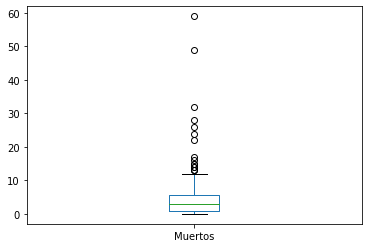

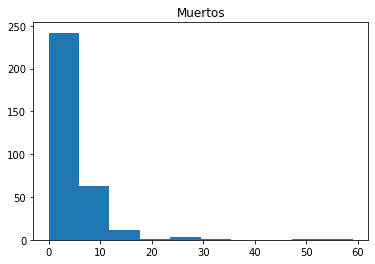

In [259]:
df.boxplot(column = 'Muertos',grid = False)
df.hist(column = 'Muertos',grid = False)
df['Muertos'].value_counts()

 1    292
-1     26
 0      5
Name: Sexo, dtype: int64

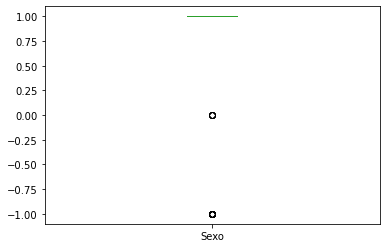

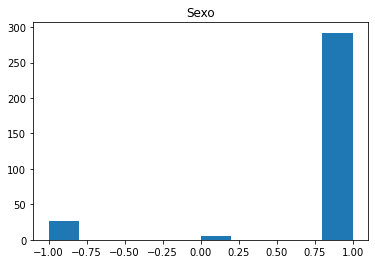

In [260]:
df.boxplot(column = 'Sexo',grid = False)
df.hist(column = 'Sexo',grid = False)
df['Sexo'].value_counts()

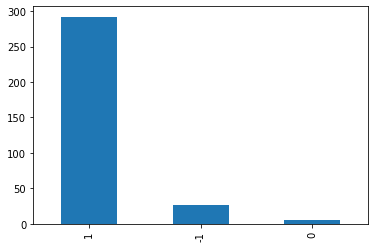

In [261]:
fig, ax = plt.subplots()
df['Sexo'].value_counts().plot(ax=ax, kind='bar')